# Primer parcial 

Estadistica Aplicada

Yessica Abigail Santiago Hernandez 1990002

Gpo44

In [6]:
#Instalacion de librerias 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
%matplotlib inline


1. Cargar la base de datos 

In [7]:
peliculas = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/peliculas.csv')

In [8]:
peliculas.tail()

,title,description,release_year,rental_rate,length,rating,special_features,category
995,Young Language,A Unbelieveable Yarn of a Boat And a Database ...,2006,0.99,183,G,"Trailers,Behind the Scenes",Documentary
996,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...,2006,0.99,179,NC-17,"Trailers,Behind the Scenes",Music
997,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...,2006,0.99,105,NC-17,Deleted Scenes,Horror
998,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...,2006,2.99,101,R,"Trailers,Deleted Scenes",Children
999,Zorro Ark,A Intrepid Panorama of a Mad Scientist And a B...,2006,4.99,50,NC-17,"Trailers,Commentaries,Behind the Scenes",Comedy


a) Cuantas películas hay, cuantos géneros, y cuanto duran en promedio las
películas

In [9]:
#Encontrar el numero de peliculas
num_pelis = peliculas['title'].count()
print(f'El numero de peliculas es de: {num_pelis}')


El numero de peliculas es de: 1000


In [10]:
#Encontrar el cuantas peliculas hay
#filtrar los generos Incluido los NaN
generos = pd.DataFrame(peliculas.groupby('category',dropna=False)['title'].count())
#contar el numero de fila = el numero de generos
num_generos = len(generos.index)
print(f'Existen {num_generos} generos')

Existen 17 generos


In [11]:
#Encontrar cuanto dura en promedio las peliculas
#Pasar de minutos a horas 
peliculas['T_horas'] = peliculas['length']/60

#Sacar el promedio
promedio = peliculas['T_horas'].mean().round(2)

#mostrar resultados
print(f'el promedio de duracion de una pelicula es de {math.trunc(promedio)} hora con {((promedio-math.trunc(promedio))*60).round(0)} minutos')

el promedio de duracion de una pelicula es de 1 hora con 55.0 minutos


b) crea un dataframe llamado películas_dormir con las películas que tienen una
duración superior a 2 horas y sean documentales

In [12]:
#Filtrar po categoria y tiempo
peliculas_dormir = peliculas.query('category == "Documentary" and T_horas >= 2')
#mostrar resultados
peliculas_dormir.head()

,title,description,release_year,rental_rate,length,rating,special_features,category,T_horas
39,Army Flintstones,A Boring Saga of a Database Administrator And ...,2006,0.99,148,R,"Trailers,Commentaries",Documentary,2.466667
57,Beach Heartbreakers,A Fateful Display of a Womanizer And a Mad Sci...,2006,2.99,122,G,"Deleted Scenes,Behind the Scenes",Documentary,2.033333
128,Cause Date,A Taut Tale of a Explorer And a Pastry Chef wh...,2006,2.99,179,R,"Commentaries,Deleted Scenes,Behind the Scenes",Documentary,2.983333
141,Chicken Hellfighters,A Emotional Drama of a Dog And a Explorer who ...,2006,0.99,122,PG,"Trailers,Commentaries,Deleted Scenes,Behind th...",Documentary,2.033333
155,Clerks Angels,A Thrilling Display of a Sumo Wrestler And a G...,2006,4.99,164,G,Commentaries,Documentary,2.733333


c) Contar cuántas películas de cada género existen


In [13]:
#Imprimir el data frame que ya habia calculado los elementos de cada categoria
generos

,title
category,
Action,64
Animation,66
Children,60
Classics,57
Comedy,58
Documentary,68
Drama,61
Family,69
Foreign,73


d) Calcular la duración promedio de las películas de cada género.

In [14]:
#crear un data frame con el promedio y la categoria
prom_gen = pd.DataFrame(peliculas.groupby('category',dropna=False)['T_horas'].mean())

prom_gen

,T_horas
category,
Action,1.860156
Animation,1.850253
Children,1.830000
Classics,1.861111
Comedy,1.930460
Documentary,1.812500
Drama,1.998087
Family,1.913043
Foreign,2.028311


e) Crear una nueva columna que indique si una película es "Corta" (duración menor
a 1.5 horas), "Normal" (entre 1.5 y 2.5 horas) o "Larga" (mayor a 2.5 horas)

In [15]:
condiciones = [peliculas['T_horas']<1.5, np.logical_and(peliculas['T_horas']>= 1.5 ,peliculas['T_horas']<= 2.5), peliculas['T_horas']>2.5]
valores =['Corta','Normal','Larga']
peliculas['Duracion'] = np.select(condiciones,valores,default='invalido')

peliculas.head(5)


,title,description,release_year,rental_rate,length,rating,special_features,category,T_horas,Duracion
0,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,0.99,86,PG,"Deleted Scenes,Behind the Scenes",Documentary,1.433333,Corta
1,Ace Goldfinger,A Astounding Epistle of a Database Administrat...,2006,4.99,48,G,"Trailers,Deleted Scenes",Horror,0.800000,Corta
2,Adaptation Holes,A Astounding Reflection of a Lumberjack And a ...,2006,2.99,50,NC-17,"Trailers,Deleted Scenes",Documentary,0.833333,Corta
3,Affair Prejudice,A Fanciful Documentary of a Frisbee And a Lumb...,2006,2.99,117,G,"Commentaries,Behind the Scenes",Horror,1.950000,Normal
4,African Egg,A Fast-Paced Documentary of a Pastry Chef And ...,2006,2.99,130,G,Deleted Scenes,Family,2.166667,Normal


2. Poblacion de asgard

Importacion de la base de datos

In [16]:
asgard = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/poblacion_Asgard.csv')
asgard.head()

,País,Estado,Municipio,Población
0,Asgard,Pandora,Reino Tierra,377896
1,Asgard,Alderaan,Fuente Dorada,49984
2,Asgard,Genosha,El Carmen,303918
3,Asgard,Naboo,Omashu,265712
4,Asgard,Mordor,Don Bosco,121151


a) Ordena la base alfabéticamente por estado y por municipio

In [17]:
asgard.sort_values(['Estado','Municipio'])

,País,Estado,Municipio,Población
16,Asgard,Alderaan,Ciudad Jedi,130312
1,Asgard,Alderaan,Fuente Dorada,49984
31,Asgard,Alderaan,Luz azul,914910
76,Asgard,Alderaan,Madero,774290
46,Asgard,Alderaan,San Isidro,159338
...,...,...,...,...
8,Asgard,Yaven,El Bosque,649663
83,Asgard,Yaven,Green Flag,380989
68,Asgard,Yaven,Santa María,111687
53,Asgard,Yaven,Villa Wendy,646914


b) Cuantos estados hay, cuantos municipios hay en cada estado y cuantos
municipios hay en total.

In [18]:
#saber cuantos estados hay
est_mun= pd.DataFrame(asgard.groupby('Estado',dropna=False)['Municipio'].count())
num_estad = len(est_mun.index)
print(f'Hay {num_estad} estados es el pais de asgard')

Hay 15 estados es el pais de asgard


In [19]:
#Saber cuantos municipios hay en cada estado
est_mun

,Municipio
Estado,
Alderaan,6
Atlantis,6
Endor,6
Genosha,6
Gotham,6
Mandalore,6
Mordor,6
Mustafar,6
Naboo,6


c) Cuanta población tiene el país en total y cuanta población tiene cada estado

In [20]:
mun_pobl= pd.DataFrame(asgard.groupby('Municipio',dropna=False)['Población'].sum())
mun_pobl.columns = ['Poblacion total']
num_mun = len(mun_pobl.index)
print(f'Hay {num_mun} municipios es el pais de asgard')

Hay 59 municipios es el pais de asgard


d) Calcula la mediana de la población de los municipios, y clasifícalos, aquellos por
arriba de la mediana deben llamarse “muy poblados” y aquellos debajo de la
mediana “poco poblados”

In [21]:
#Sacar la mediana 
mun_pobl = mun_pobl.sort_values('Poblacion total')
dato_med = math.ceil(len(mun_pobl.index)/2)
mediana = mun_pobl.iloc[dato_med-1,0]
mun_pobl['Nivel de poblacion'] = np.where(mun_pobl['Poblacion total']<mediana ,'poco poblados','muy poblados')

mun_pobl


,Poblacion total,Nivel de poblacion
Municipio,,
Luz roja,14986,poco poblados
Villa rosa,25538,poco poblados
Shelbyville,31535,poco poblados
Mar Azul,65044,poco poblados
Don Bosco,121151,poco poblados
San Miguel,134767,poco poblados
Pueblo Nuevo,137330,poco poblados
San Silverio,140182,poco poblados
Ciudad Jedi,143978,poco poblados


e) Encuentra los 5 municipios mas poblados y los cinco municipios menos
poblados del país

In [22]:
# cinco municipios menos poblados
menos = pd.DataFrame(mun_pobl.iloc[0:5,0:2])
menos

,Poblacion total,Nivel de poblacion
Municipio,,
Luz roja,14986,poco poblados
Villa rosa,25538,poco poblados
Shelbyville,31535,poco poblados
Mar Azul,65044,poco poblados
Don Bosco,121151,poco poblados


In [23]:
#cinco municipios mas poblados
menos = pd.DataFrame(mun_pobl.iloc[54:59,0:2])
menos

,Poblacion total,Nivel de poblacion
Municipio,,
Santa María,1619405,muy poblados
Mar amarillo,1776726,muy poblados
Yellow town,1837206,muy poblados
Coral,2068859,muy poblados
San Pedro,2297265,muy poblados


f) El municipio más poblado de cada estado


In [24]:
posiciones= asgard.groupby('Estado')['Población'].idxmax()
mayores = asgard.loc[posiciones]
mayores = mayores.sort_values('Población',ascending = False)
mayores

,País,Estado,Municipio,Población
34,Asgard,Mordor,Madripur,998079
27,Asgard,Mustafar,Villa Norte,997107
6,Asgard,Sokovia,La Unión,986067
74,Asgard,Narnia,Gral Escobedo,974548
60,Asgard,Pandora,Villa Demogorgon,969140
88,Asgard,Atlantis,Mar amarillo,961061
50,Asgard,Tatooine,Villa Marlon,925414
55,Asgard,Gotham,Playa Verde,918710
31,Asgard,Alderaan,Luz azul,914910
82,Asgard,Wakanda,Redgreen,880858


3. Generar un grafico de barras

a) Los 15 municipios más poblados de Asgard

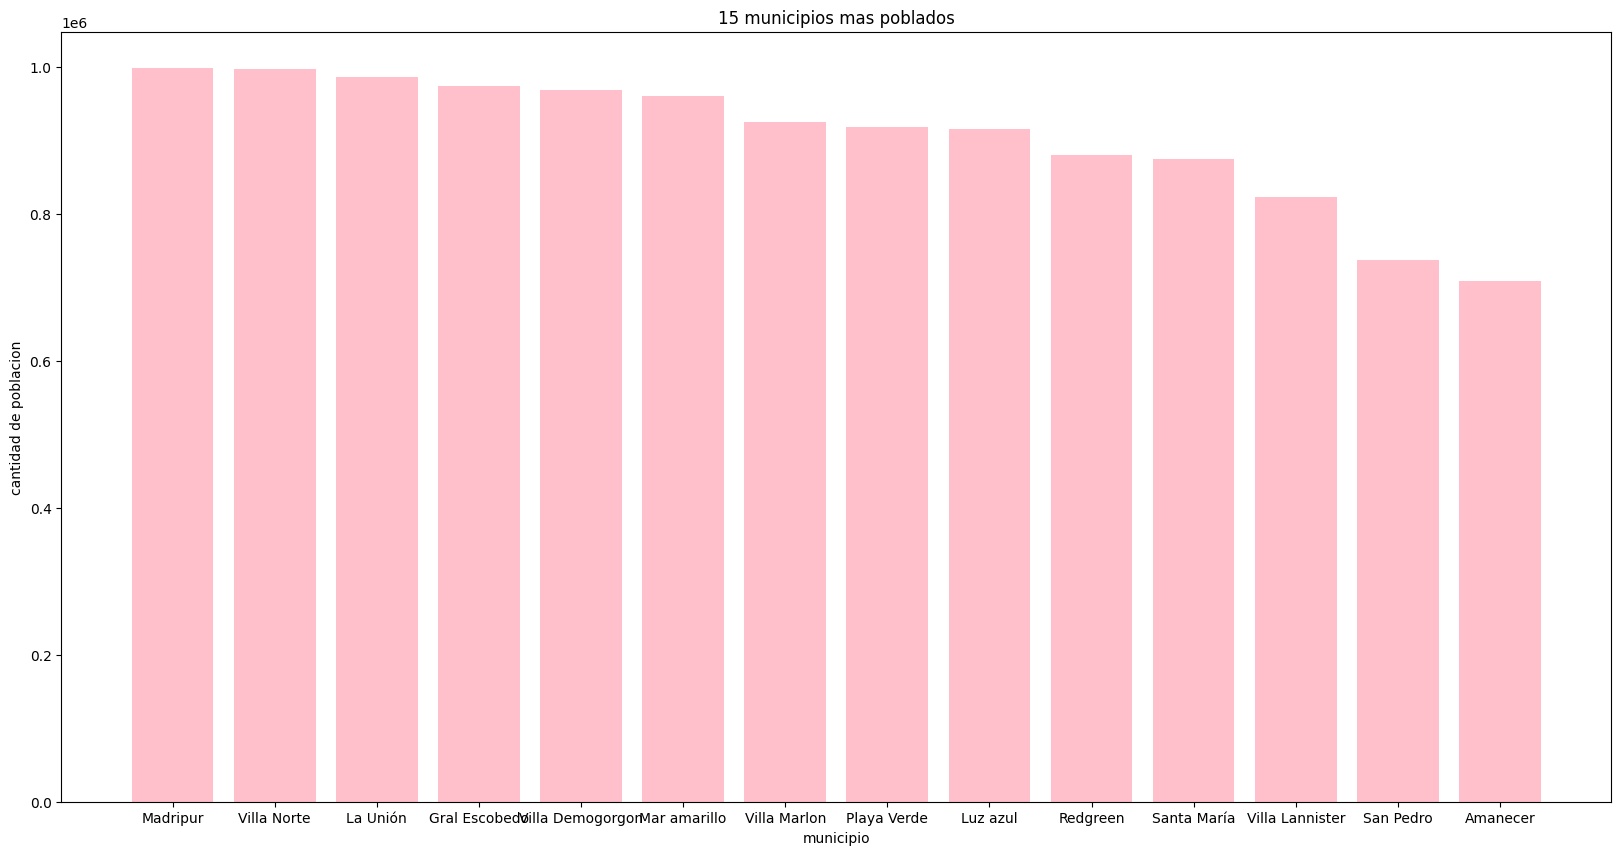

In [25]:
plt.figure(figsize=(20,10))
plt.bar(mayores['Municipio'],mayores['Población'],color = 'pink')

plt.title('15 municipios mas poblados')
plt.xlabel('municipio')
plt.ylabel('cantidad de poblacion')
plt.show()

b) Cuantas peliculas hay de cada género

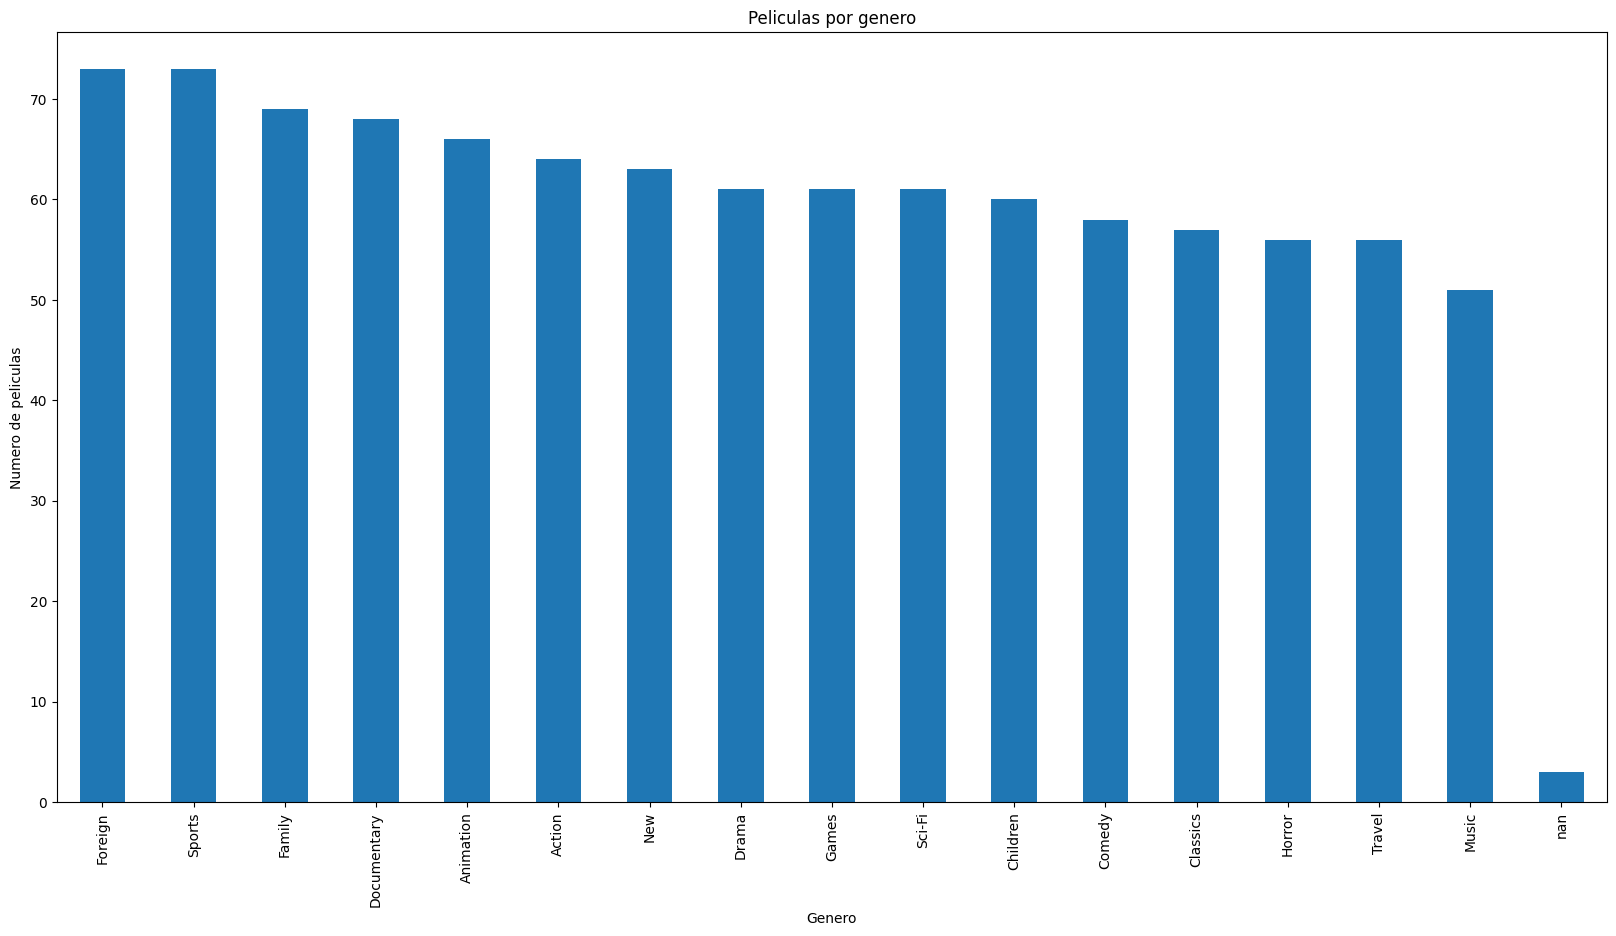

In [26]:
generos = generos.sort_values('title',ascending = False)
plt.figure(figsize=(20,10))
generos['title'].plot.bar()

plt.title('Peliculas por genero')
plt.xlabel('Genero')
plt.ylabel('Numero de peliculas')
plt.show()